In [1]:
!pip install pydotplus

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
conda 4.12.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
requests 2.19.1 has requirement urllib3<1.24,>=1.21.1, but you'll have urllib3 1.26.8 which is incompatible.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install pydot

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
conda 4.12.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
requests 2.19.1 has requirement urllib3<1.24,>=1.21.1, but you'll have urllib3 1.26.8 which is incompatible.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg

In [4]:
df = pd.read_csv('C:\\Users\\HP\\python\\DecisionTree\\animal.csv')

In [5]:
d = {'Grey':0, 'Yellow':1, 'Brown':2, 'Golden':3, 'Black-white':4, 'Black':5, 'White':6, 'Green':7}
e = {'herbivores':0, 'carnivores':1, 'omnivores':2}
f = {'elephant':0, 'giraffe':1, 'monkey':2, 'tiger':3, 'lion':4, 'zebra':5, 'buffalo':6, 'cow':7, 'crocodile':8, 'bear':9}
df['color'] = df['color'].map(d)
df['type'] = df['type'].map(e)
df['class'] = df['class'].map(f)

In [6]:
features = ['color', 'height', 'type']

X = df[features]
y = df['class']

print(X)
print(y)

    color  height  type
0       0      10     0
1       1      10     0
2       2       3     0
3       0      10     0
4       1       4     1
5       3       5     1
6       4       4     0
7       5       6     0
8       6       5     0
9       7       7     1
10      5       5     2
11      0      10     0
12      1      10     0
13      2       3     0
14      0      10     0
15      1       4     1
16      3       5     1
17      4       4     0
18      5       6     0
19      6       5     0
20      7       7     1
21      5       5     2
0     0
1     1
2     2
3     0
4     3
5     4
6     5
7     6
8     7
9     8
10    9
11    0
12    1
13    2
14    0
15    3
16    4
17    5
18    6
19    7
20    8
21    9
Name: class, dtype: int64


In [7]:
#Training and testing spliting
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)
#making an instance of the model
clf = DecisionTreeClassifier(max_depth=2, random_state = 0)
#train the model on the data
clf.fit(X_train, Y_train)
#predicting labels of test data
clf.predict(X_test)

array([3, 3, 0, 5, 5, 3], dtype=int64)

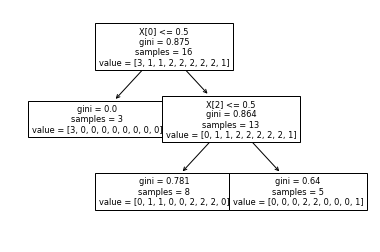

In [8]:
tree.plot_tree(clf);

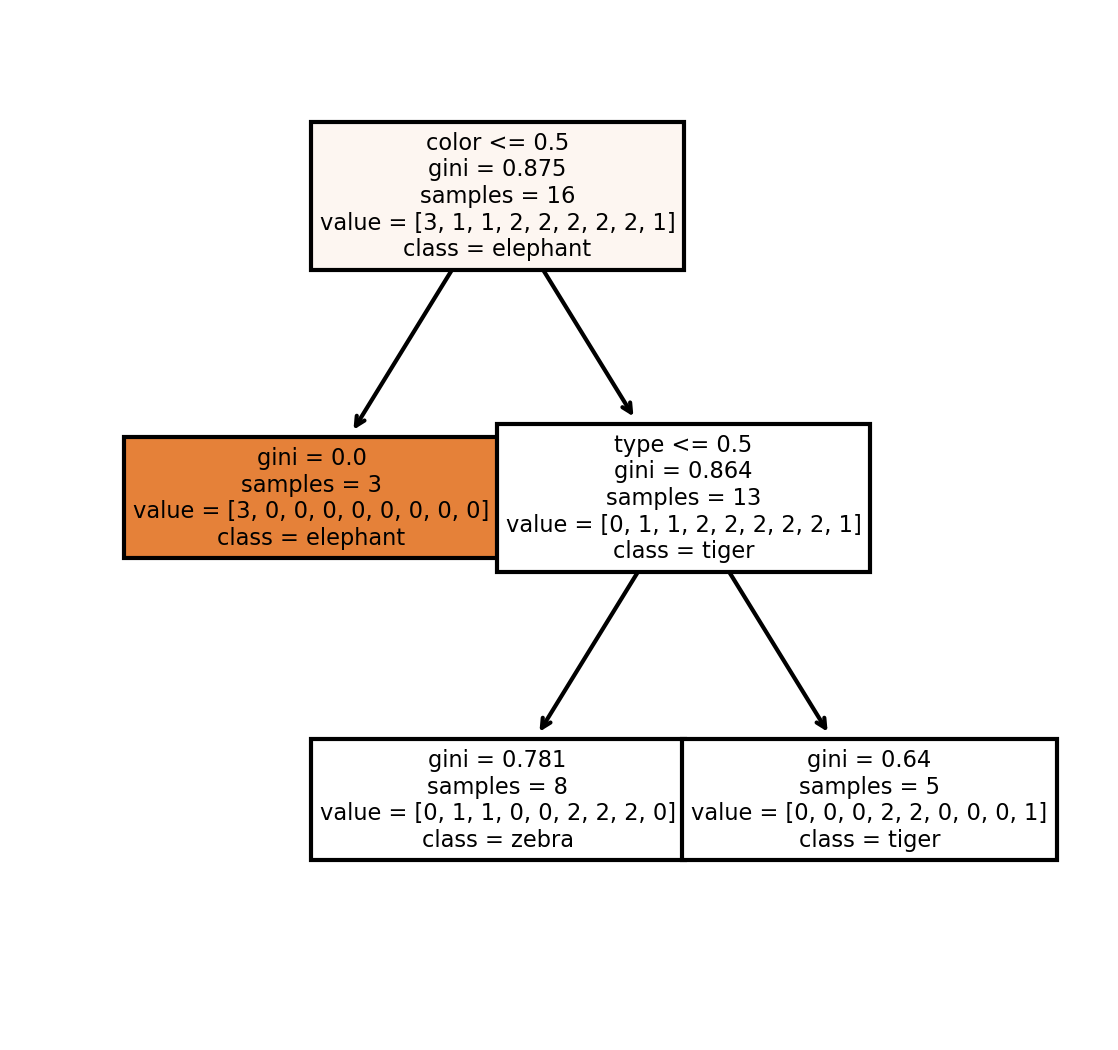

In [9]:
fn = ['color', 'height', 'type']
cn = ['elephant', 'giraffe', 'monkey', 'tiger', 'lion', 'zebra', 'buffalo', 'cow', 'crocodile', 'bear']
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);
fig.savefig('imagename.png')

In [10]:
import graphviz
fn = ['color', 'height', 'type']
data = tree.export_graphviz(clf, out_file = None, feature_names=fn)
# graph = pydotplus.graph_from_dot_data(data)
graph = graphviz.Source(data)
# graph.write_png('mydecisiontree.png')
graph.view('mydecisiontree.png')
# img = pltimg.imread('mydecisiontree.png')
# imgplot = plt.imshow(img)
# plt.show()

'mydecisiontree.png.pdf'

In [11]:
print(graph)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="color <= 0.5\ngini = 0.875\nsamples = 16\nvalue = [3, 1, 1, 2, 2, 2, 2, 2, 1]"] ;
1 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0, 0, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="type <= 0.5\ngini = 0.864\nsamples = 13\nvalue = [0, 1, 1, 2, 2, 2, 2, 2, 1]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.781\nsamples = 8\nvalue = [0, 1, 1, 0, 0, 2, 2, 2, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.64\nsamples = 5\nvalue = [0, 0, 0, 2, 2, 0, 0, 0, 1]"] ;
2 -> 4 ;
}
